<a href="https://colab.research.google.com/github/arjun28115/Computer-Vision-Project/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import cv2
import os

img_path = os.path.join("images", "sample1.jpg")
img_bgr = cv2.imread(img_path)

if img_bgr is None:
    raise FileNotFoundError("Image not found. Check the path.")


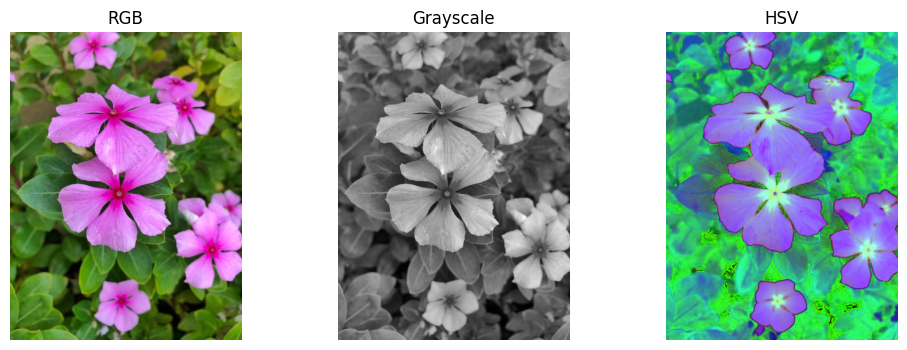

In [149]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("RGB")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Grayscale")
plt.imshow(img_gray, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("HSV")
plt.imshow(img_hsv)
plt.axis("off")

plt.show()


Why OpenCV uses BGR instead of RGB:

OpenCV follows the BGR format due to legacy reasons from early image processing libraries and Windows bitmap standards. This choice was kept for backward compatibility, even though RGB is more common today.

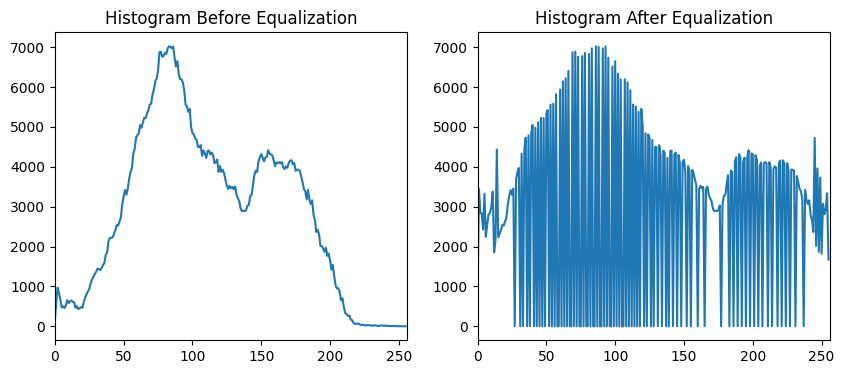

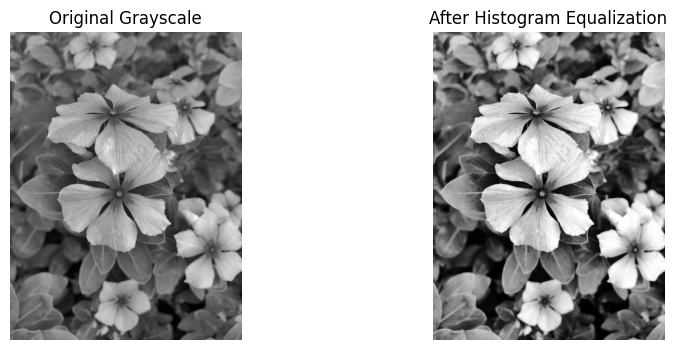

In [150]:
hist_before = cv2.calcHist([img_gray], [0], None, [256], [0,256])

img_eq = cv2.equalizeHist(img_gray)

hist_after = cv2.calcHist([img_eq], [0], None, [256], [0,256])

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Histogram Before Equalization")
plt.plot(hist_before)
plt.xlim([0,256])

plt.subplot(1,2,2)
plt.title("Histogram After Equalization")
plt.plot(hist_after)
plt.xlim([0,256])

plt.show()

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original Grayscale")
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("After Histogram Equalization")
plt.imshow(img_eq, cmap="gray")
plt.axis("off")

plt.show()


What visible change do you observe after equalization?

Histogram equalization increases overall contrast, making dark regions darker and bright regions brighter, so details become more clearly visible.

In what kind of images is histogram equalization not useful?

It is not useful for images that already have good contrast or for images where brightness variations carry important information (e.g., medical images or images with uniform illumination), as it can amplify noise or distort details.

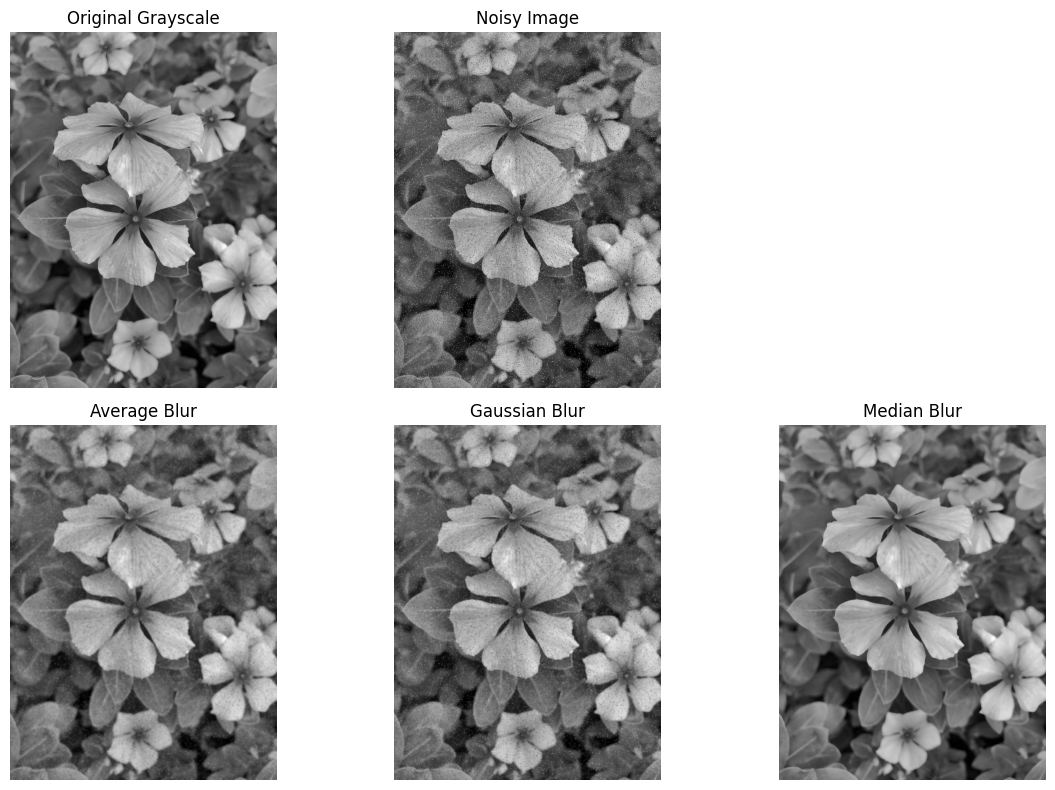

In [151]:
noise = img_gray.copy()
prob = 0.02
rand = np.random.rand(*img_gray.shape)
noise[rand < prob] = 0
noise[rand > 1 - prob] = 255

avg_blur = cv2.blur(noise, (5, 5))
gaussian_blur = cv2.GaussianBlur(noise, (5, 5), 0)
median_blur = cv2.medianBlur(noise, 5)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Grayscale")
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Noisy Image")
plt.imshow(noise, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("Average Blur")
plt.imshow(avg_blur, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Gaussian Blur")
plt.imshow(gaussian_blur, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("Median Blur")
plt.imshow(median_blur, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


Which filter handled noise best?

Median Blur handled noise best, especially salt-and-pepper noise, because it removes outlier pixels without averaging them.


Which filter preserved edges better?

Median Blur preserved edges better, as it reduces noise while maintaining sharp intensity transitions compared to averaging-based filters.

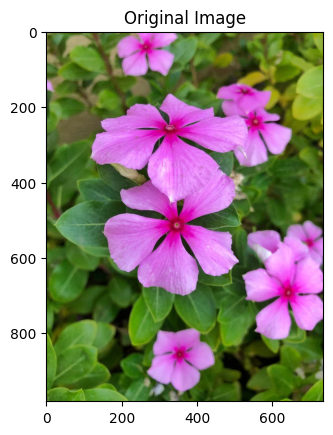

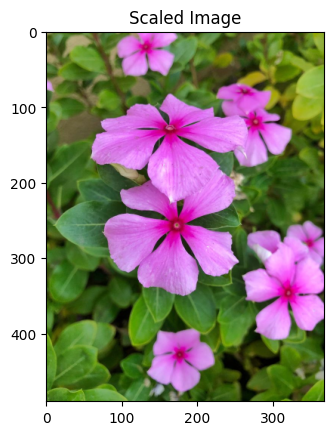

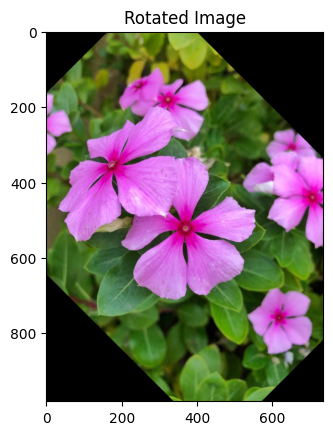

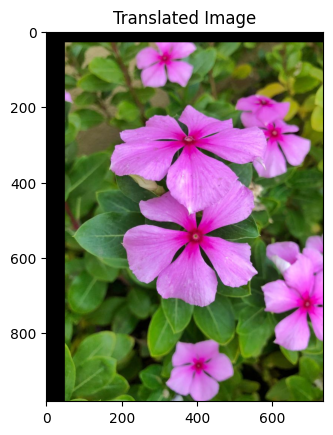

In [152]:
image_scaled = cv2.resize(img_bgr, None, fx=0.5, fy=0.5)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
title = "Original Image"
plt.title(title)
plt.show()
plt.imshow(cv2.cvtColor(image_scaled, cv2.COLOR_BGR2RGB))
title = "Scaled Image"
plt.title(title)
plt.show()

height, width = img_bgr.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, 1)

rotated_image = cv2.warpAffine(img_bgr, rotation_matrix, (width, height))
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
title = "Rotated Image"
plt.title(title)
plt.show()

T = np.float32([[1, 0, 50], [0, 1,30]])

img_translation = cv2.warpAffine(img_bgr, T, (width, height))
plt.imshow(cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB))
title = "Translated Image"
plt.title(title)
plt.show()

Why do geometric transformations often introduce black regions?

Geometric transformations move pixels outside the original image boundaries, creating empty areas where no pixel values exist. These undefined regions are filled with a default value (usually black) unless a different border handling method is specified.

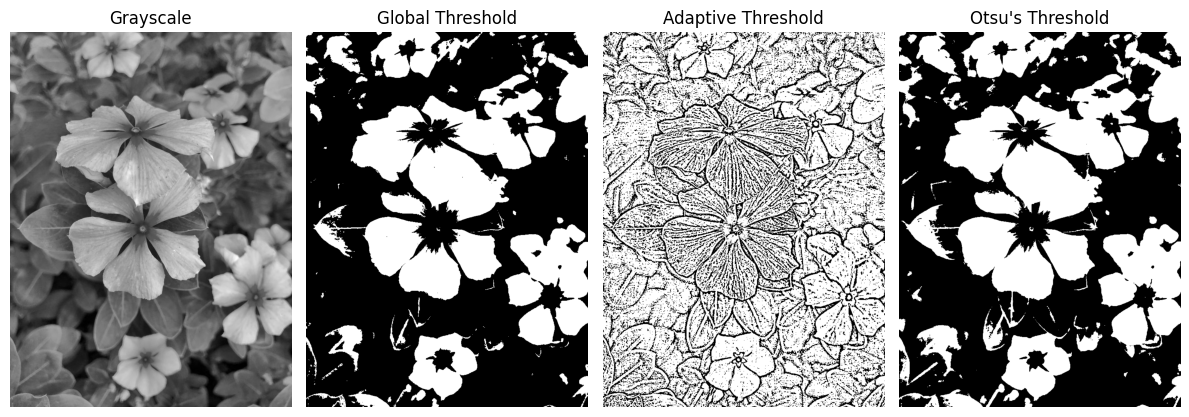

In [153]:
_, th_global = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

th_adaptive = cv2.adaptiveThreshold(img_gray, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11, 2)

_, th_otsu = cv2.threshold(img_gray, 0, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.title("Grayscale")
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Global Threshold")
plt.imshow(th_global, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Adaptive Threshold")
plt.imshow(th_adaptive, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Otsu's Threshold")
plt.imshow(th_otsu, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

Which method worked best and why?

Adaptive thresholding worked best because it computes local thresholds, handling uneven lighting and varying illumination more effectively than a single global threshold.

When would global thresholding fail badly?

Global thresholding fails when illumination is non-uniform or when foreground and background intensities overlap, causing important details to be lost.

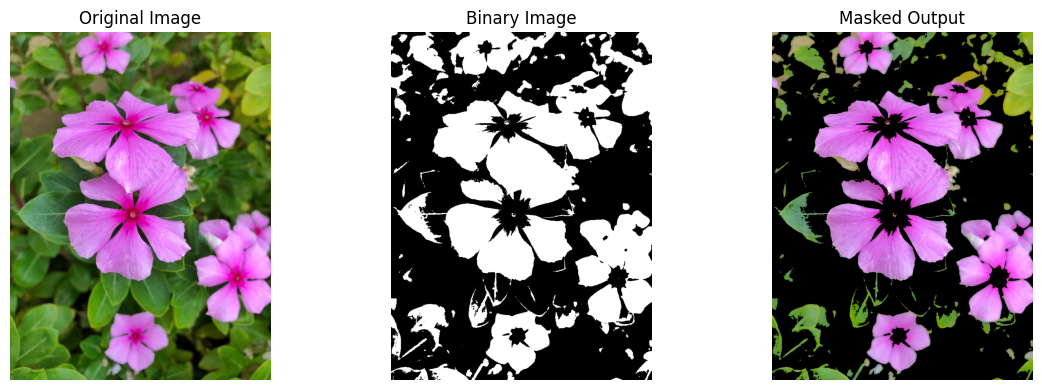

In [154]:
_, binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

masked = cv2.bitwise_and(img_bgr, img_bgr, mask=binary)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
masked_rgb = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Binary Image")
plt.imshow(binary, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Masked Output")
plt.imshow(masked_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

Thresholding acts as segmentation by separating pixels into foreground and background based on intensity values. Pixels above or below a chosen threshold are grouped together, forming a binary mask. This mask isolates the main object while suppressing irrelevant regions. Thus, thresholding performs a simple yet effective form of image segmentation.

Why is smoothing often applied before thresholding?

Smoothing reduces noise and small intensity fluctuations that can cause incorrect pixel classification during thresholding. By removing noise, thresholding produces cleaner and more stable binary regions.

Why is HSV sometimes better than RGB for segmentation?

HSV separates color information (Hue) from illumination (Value), making segmentation less sensitive to lighting changes. This allows objects to be segmented based on color more reliably than in RGB, where color and brightness are mixed.

Can histogram equalization negatively affect thresholding? Explain.

Yes. Histogram equalization can amplify noise and distort intensity distributions, which may merge or split regions incorrectly. This can make it harder to choose a meaningful threshold, especially in already well-contrasted images.

Why does OpenCV prefer built-in functions over manual pixel loops?

OpenCV’s built-in functions are highly optimized in C/C++ and use vectorization and hardware acceleration. Manual pixel loops in Python are slower, error-prone, and inefficient for large images.